<a href="https://colab.research.google.com/github/victorjorgeecono/Correlacao_Dolar_ibovespa/blob/main/1_Correla%C3%A7%C3%A3o_Ibovespa_e_D%C3%B3lar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 - Primeiramente instalaremos as bibliotecas que vamos utilizar para extrair os dados e fazer a análise

In [ ]:
!pip install pandas 
!pip install pandas_datareader 
!pip install yfinance
!pip install numpy
!pip install matplotlib
!pip install seaborn

2 - Após a instalação das bibliotecas, vamos importá-las e abreviar o nome das mesmas.

In [34]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import yfinance as yf
import seaborn as sns



*   O  próximo passo é definir nosso período de análise
*   O formato da data será no padrão aaaa/mm/dd, com base na nossa base de dados





In [9]:
# O primeiro passo é definir nosso período inicial e final 
# 
data_inicio = '2009-01-01'
data_final = '2021-07-01'

 
3 - Definindo nossa análise

*  Como nosso intuito é analisar a correlação entre as variações dos preços do Ibovespa e as variações dos preços do Dólar/Real, precisamos evidenciar e buscar nossos dados de algum banco de dados
*  
Para isso, vamos usar os dados do Yahooo finance. Para conferir se a nomenclatura dos termos está certa é recomendado ir no site e pesquisar na aba e usar o nome referenciado na sua lista, como segue o exemplo abaixo:




In [59]:
analise = ['^BVSP', 'USDBRL=X' ]

4 - Extraindo os dados


*   Apos criar nossa lista que será analisada, vamos extrair os dados por uma função do próprio yahoo finance, a yfinance.




In [58]:
carteira1 = yf.download(analise, start= data_inicio)['Adj Close']

[*********************100%***********************]  2 of 2 completed


4.1 - Conferindo nossa tabela:

In [60]:
carteira1

,USDBRL=X,^BVSP
Date,,
2009-01-01,2.3240,NaN
2009-01-02,2.3130,40244.0
2009-01-05,2.2165,41519.0
2009-01-06,2.1390,42312.0
2009-01-07,2.1725,40820.0
...,...,...
2021-07-14,5.1624,128407.0
2021-07-15,5.0699,127468.0
2021-07-16,5.1100,125960.0


5 - Renomeando as colunas

In [61]:
carteira1.columns = ['Dólar', 'Ibovespa']


5.1  Conferindo se as colunas foram renomeadas

In [62]:
carteira1

,Dólar,Ibovespa
Date,,
2009-01-01,2.3240,NaN
2009-01-02,2.3130,40244.0
2009-01-05,2.2165,41519.0
2009-01-06,2.1390,42312.0
2009-01-07,2.1725,40820.0
...,...,...
2021-07-14,5.1624,128407.0
2021-07-15,5.0699,127468.0
2021-07-16,5.1100,125960.0


6 - Vamos plotar o gráfico para vermos se há algo suspeito nos dados, como por exemplo, valores vazios.

In [ ]:
sns.set()
carteira1.plot(subplots= True, figsize = (22,8))

6.1 - Removedo valores vazios

*   Vizualmente podemos notar que há um 'vázio' em datas diversas de ambos papéis.
*  Vamos remover esses valores vazios usando um comando `dropna`para remover os valores nulos da nossa base.



In [64]:
carteira2 = carteira1.dropna()

6.2 - Vamos plotar novamente para conferir

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f72bc68a750>,
      dtype=object)

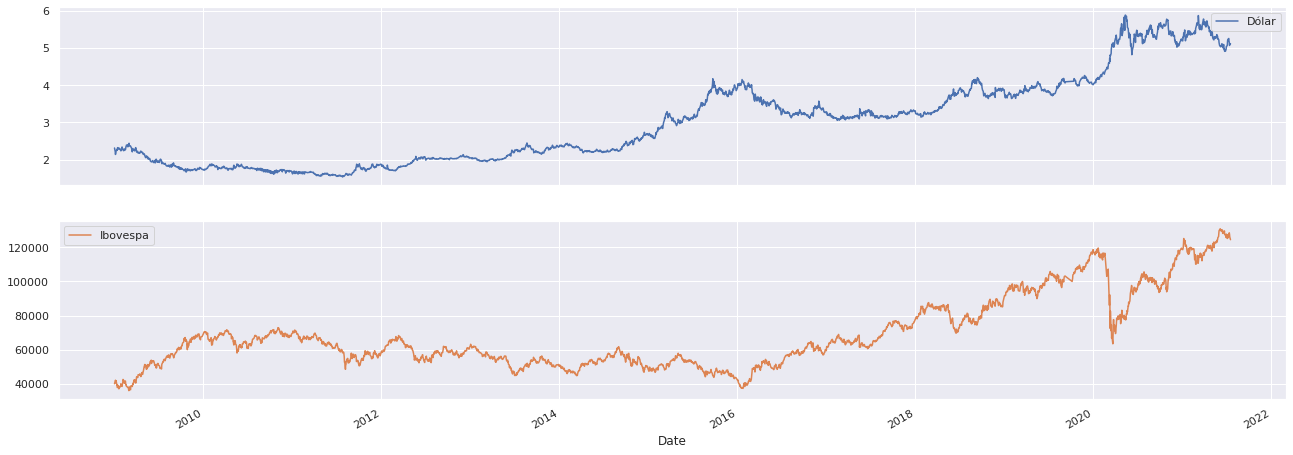

In [65]:
sns.set()
carteira2.plot(subplots= True, figsize = (22,8))

7 - Por último, vamos calcular a correlação entre as variáveis:
 *O objetivo do estudo da correlação é determinar (mensurar) o grau de
relacionamento entre duas variáveis.*

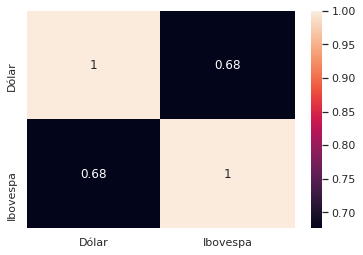

In [55]:
  sns.heatmap(carteira2.corr(), annot= True)